# Homogeneous discharges

## Aim : To get a homogeneous (=continuous) disharge time series in the channel using a stage/discharge relation

### Protocol:

- Target the best station to do so: 
    - channel geometry is supposed to be constant (no widening), 
    - water height from CTD has to stick as most as possible to hand measurement (see [`Temperature_and_Stage.ipynb`](Temperature_and_Stage.ipynb))
    - stage has to be well documented at this gate for the discharge reconstruction
- Fit a law between stage and discharge scatter plot for this gate (we chose P3)
- Apply this law for the continous stage time series


In [1]:
using PyPlot
using DelimitedFiles, Dates
using NBInclude
using MonteCarloMeasurements
@nbinclude("helper-functions.ipynb");

## Discharges from salt dilution (observations)

Let's take a look about what data are avaibale for a such relationship

**Import Discharges value and time corresponding from CSV files**

Notebook [`P1_Discharges.ipynb`](P1_Discharges.ipynb), [`P2_Discharges.ipynb`](P2_Discharges.ipynb),[`P3_Discharges.ipynb`](P3_Discharges.ipynb)

In [42]:
d, head = readdlm(path_products*"discharge_P1.csv" , ',', header=true);
Qs1 = d[:,2];
ts1 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"discharge_P2.csv" , ',', header=true);
Qs2 = d[:,2];
ts2 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

d, head = readdlm(path_products*"discharge_P3.csv" , ',', header=true);
Qs3 = d[:,2];
err_Qs3 = d[:,3]
ts3 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

**Plot all discharges**

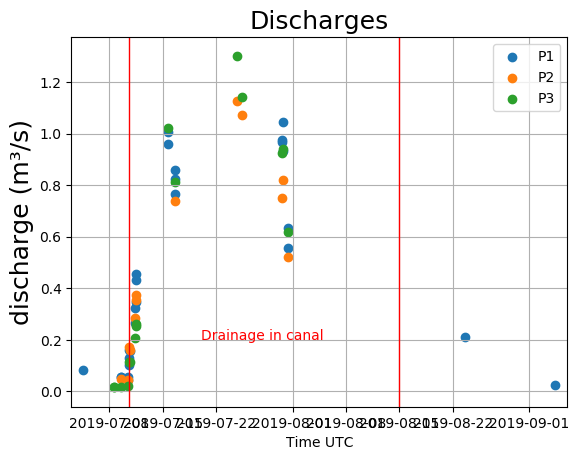

In [43]:
fig=figure()
pygui(false)
# plot the discharge vs time:
scatter(ts1, Qs1, label="P1")
scatter(ts2, Qs2, label="P2")
scatter(ts3, Qs3, label="P3")
xlabel("Time UTC",fontsize=10)
ylabel("discharge (m³/s)",fontsize=18)
grid(true)
legend()
xlim(Date(2019,7,3),Date(2019,9,6))
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
axvline(x=DateTime(2019,8,15),linewidth=1,color="r")  
text(DateTime(2019,7,20),0.2,"Drainage in canal", color="r")
title("Discharges",fontsize=18)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")


# Water stage VS Discharge at P3

**P3 shows the more complete water stage time serie, and the most relevant one regarding the water stage validation from field observations**

Also: P3 is the only gate showing a clear relationship on a scatterplot stage/discharge. The other don't (note that the scatterplot for other gates are not shown here)

### import water stage at P3 

In [44]:
d, head = readdlm(path_products*"stage3_corr_raw.csv" , ',', header=true);
stage3 = d[:,2];
t3 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

### Visual evaluation of discharge/stage

In [45]:
pygui(false)
#Validation water height from field measurements at P3
x=[DateTime(2019,7,8,12,30),DateTime(2019,7,8,14,40),DateTime(2019,7,9,14,35),
    DateTime(2019,7,10,14,5),DateTime(2019,7,11,10,10),DateTime(2019,7,11,12,35), DateTime(2019,7,16,13,17),DateTime(2019,7,25,9,48),
    DateTime(2019,7,30,13,20),DateTime(2019,8,8,12),DateTime(2019,8,14,9,45),DateTime(2019,8,23,12,46),DateTime(2019,9,4,9,54)]
y=[0.09,0.08,0.18,0.23,0.23,0.3,0.35,0.55,0.5,0.4,0.3,0.33,0.1];

fig=figure()
plot(t3,stage3,linestyle="-",label="Water stage",zorder=-1)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
ylim(-0.1,0.8)
title("Water height at P3 and salt dilution (in red)")
xlabel("Time")
ylabel("Water stage (m)",color="blue")
scatter(x,y,color="black",label="Field observations")

#plot when salt dilution are reccording (discharge measurements)



legend()





PyObject <matplotlib.legend.Legend object at 0x00000000637A38D0>

### Plot `Qs3` VS `stage3` 

`stage3` is already corrected - We add 2 water height fields measurements the 10th and 16th July (associated with discharge) to complete the
relationship

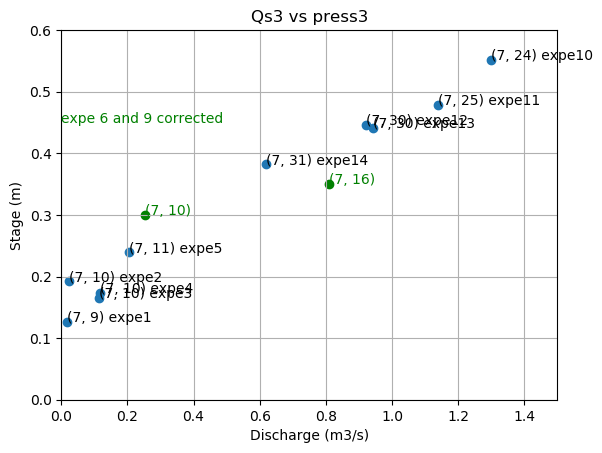

No Discharge/water stage for expe 1 
No Discharge/water stage for expe 2 


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [46]:
pygui(false)
K=[]
purge=[]
for j in 1:length(Qs3)
    k = findfirst(x -> x == ts3[j],t3)
    if k == nothing 
        append!(purge,j)
        println("No Discharge/water stage for expe $j ")
    else 
        append!(K,k)
    end   
end

deleteat!(Qs3, purge)   #WARNING: Qs3 is modified: Because there is no pressure data the 8th July,
# the first 2 salt dilutions on 8th July will be deleted 
#That means that Qs1[1] in the following is Qs3[3] in reality, Qs3[2] is Qs3[4] in reality, etc...
deleteat!(ts3, purge)   
deleteat!(err_Qs3, purge)

stage3_select = stage3[K]

#plot stage VS discharge
scatter(Qs3,stage3_select)

xlim(0,1.5)
ylim(0,0.6)
xlabel("Discharge (m3/s)")
ylabel("Stage (m)")
title("Qs3 vs press3")

# Identify injection numbers
for i in 1:length(ts3)
    local d = Dates.monthday(ts3[i])
   
    text(Qs3[i],stage3_select[i],"$d expe$i")
    
end

#corrected water height from field measurement
scatter(Qs3[6],0.3,color="green")
text(Qs3[6],0.3,"(7, 10)",color="green")
grid(true)

scatter(Qs3[9],0.35,color="green")
text(Qs3[9],0.35,"(7, 16)",color="green")

text(0,0.45,"expe 6 and 9 corrected",color="green");

### Add more stage/discharge values from field observations

In [47]:
#replace stage3_select[6 and 9] by two hand measurements
[stage3_select[i] = 0.3 for i=6]
[stage3_select[i] = 0.35 for i=9];

### Ultimately remove NaN to prepare the fit (no NaN is allowed in the following steps) 

In [48]:
deleteat!(stage3_select, [7,8])
deleteat!(Qs3, [7,8]);
deleteat!(ts3, [7,8]);
deleteat!(err_Qs3, [7,8]);

In [49]:
ts3

12-element Array{DateTime,1}:
 2019-07-09T11:01:05
 2019-07-10T10:08:00
 2019-07-10T14:47:25
 2019-07-10T15:30:10
 2019-07-11T09:21:05
 2019-07-11T12:26:25
 2019-07-16T14:08:15
 2019-07-24T16:58:55
 2019-07-25T08:38:40
 2019-07-30T14:44:15
 2019-07-30T18:29:45
 2019-07-31T09:36:35

In [50]:
stage3_select

12-element Array{Any,1}:
 0.126
 0.192
 0.165
 0.174
 0.239
 0.3
 0.35
 0.552
 0.478
 0.446
 0.441
 0.382

## Fit a  law $ Q = ah^b $ 

with Q the discharge and h the stage. We fit `a` and `b`

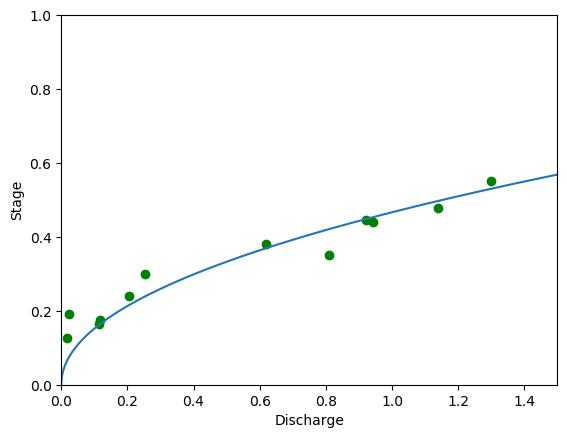

Estimated fit: f(discharge) = a*stage^b with
     a = 4.78±0.951
        and b = 2.05±0.249


In [9]:
pygui(false)
scatter(Qs3,stage3_select,color="green")
xlim(0,1.5)
ylim(0,1)

using LsqFit
fn(stage3_select, p) = p[1]*stage3_select.^p[2] # p[1]==a, p[2]==b
para_weights = [0.5, 0.5] # equal weights to parameters
fit = curve_fit(fn, stage3_select, Qs3, para_weights)
# to get margin of error and confidence interval of each parameter at 5% significance level:
errors = margin_error(fit, 1-0.95);
confidence_inter = confidence_interval(fit, 0.05)
# to get standard error of each parameter:
sigma = stderror(fit)
readouts =  range(0, 1, step=0.01)
plot((fn(readouts, fit.param)),readouts)
xlabel("Discharge")
ylabel("Stage")
println("Estimated fit: f(discharge) = a*stage^b with
     a = $(round(fit.param[1],sigdigits=3))±$(round(sigma[1],sigdigits=3))
        and b = $(round(fit.param[2],sigdigits=3))±$(round(sigma[2],sigdigits=3))")



#savefig(path_plots*"rating_curve.png")

# Obtain discharge in channel `pq3` from continuous water stage time series

**Using the stage/discharge relationship, or "rating curve"**

In [10]:
#Determine qp3 from stage3

qp3=[]
for i in eachindex(stage3)
    local q = fn(stage3[i], fit.param)
    append!(qp3,q)
end

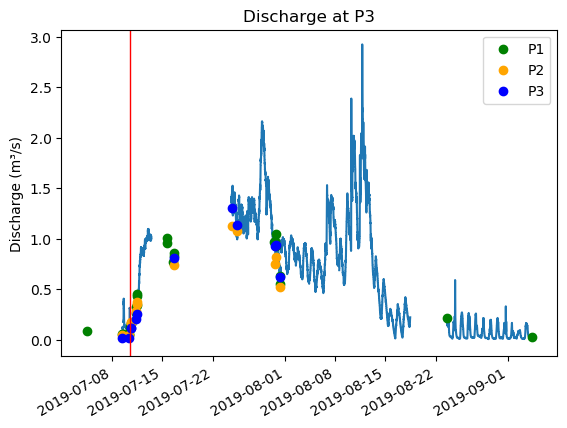

PyObject <matplotlib.legend.Legend object at 0x000000005F245C88>

In [11]:
pygui(false)
fig=figure()
plot(t3,qp3,zorder=-1)
title("Discharge at P3")
ylabel("Discharge (m³/s)")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")  
axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")


scatter(ts1,Qs1,color="green",label="P1")
scatter(ts2,Qs2,color="orange",label="P2")
scatter(ts3,Qs3,color="blue",label="P3")
legend()
    

## Validation of the fit: Root Mean Square method

 We compare the "modelled" discharge qp3 with direct discharge measurements at others stations and other time.

$$RMSD = \sqrt{\frac {\Sigma (Q_{modeled} - Q_{obs})^2}{T}}$$

Where $Q_{modeled} = qp3$ and $Q_{obs} = Q_i$ obtained from salt dilution at others stations than P3 and other time

In [12]:
Q_obs = vcat(Qs1,Qs2)
t_obs = vcat(ts1,ts2);

T = 0
dif =[]

for i in 8:length(Q_obs)   #8 (=10 july 14h) because that is the start of drainage, before qp3 is not relevant.
    t = findfirst(x -> x == ceil(t_obs[i],Dates.Second(5)),t3)#rounding at 5 second, which is the time step of t3
    if t != nothing && !isnan(qp3[t])
        d = (Q_obs[i] - qp3[t])^2
        append!(dif, d)
        T = T + 1
    end
end
    
RMSD = sqrt(sum(dif)/(T-1)) #because T had been incremented once more at the end (see above)

0.11098046936006181

In [13]:
#number of comparisons
T-1

19

Given the small value of $RMSD$ over 19 measurements outside P3, We validate the stage/discharge relation.

## Up-scale discharge time series : daily and hourly mean

In [14]:
qp3_daily = upscale_timeseries(qp3, t3, "day")
qp3_hour = upscale_timeseries(qp3, t3, "hour");



# Uncertainties assessment

We want to calculate the uncertainties on discharge according to the following equation:

  $ Q = a  h^b $ 

$Q$ is discharge, $h$ is water stage, $a$ and $b$ are fit parameters

**Origins of uncertainties:**

   a and b standard errors are estimated in [`Discharge_homogenization.ipynb`](Discharge_homogenization.ipynb) from the least square method.

   Uncertainites on water stage $h$ is deduced from CTD water stage measurements compared with manual water depth measurements as validation. Uncertainties are also explicited in the [data sheet](https://keller-druck.com/en/products/data-loggers/multi-parameter-loggers/dcx-22aa-ctd) Keller web page. 

**Note: uncertainties on the direct discharge and stage measurements (where we fitted the curve) are not estimated for instance. They come from manual water depth measurement (± 5cm) and conductivity uncertainties (± 50 microS/cm)** 

Uncertainties in conductivity are propagated in discharge measurements through $ Q = \frac{M}{\int C \, d t}$ ; concentration C is deduced from conductivity measurements through the function `integration_concentration`.


#### Uncertainties propagation using `MontCarloMeasurements` 

This is more appropriate for no-linear function, like in our case

[MonteCarloMeasurements](https://baggepinnen.github.io/MonteCarloMeasurements.jl/stable/#Constructors-1)

In [15]:
#We use the standard deviation to assess uncertainty 

#error on conductivity
err_cond = 50 #microS/cm in the [0-2000]microS/cm range that we used

#error on water stage from CTD pressure 
err_stage = 0.02 #checked the 16 July at P5 when i probed exactly were the sensor was
err_stage_hand = 0.05 #uncertainties from hand measurements using probe (in m)

#error on the stage/discharge relation curve fit
a = round(fit.param[1],sigdigits=3) ± round(sigma[1],sigdigits=3) # #a = 4.77 ± 0.95 
b = round(fit.param[2],sigdigits=3) ± round(sigma[2],sigdigits=3) #b = 2.05 ± 0.25;

In [16]:
a

Particles{Float64,2000}
 4.78 ± 0.951

In [17]:
b

Particles{Float64,2000}
 2.05 ± 0.249

#### Direct discharge measurements from conductivity measurements

1. We implemented uncertainty on conductivity measurements (`err_cond`) in the function `fit-calibration` for the range [0-2000] (see [`helper-functions.ipynb`](helper-functions.ipynb)). **BUT for unstability reasons, the err_cond is 0 in `fit-calibration` for now... (probably because of propagation of negative concentration) instead of 50 microS/cm**


2. We fit the calibration curve in `fit-calibration` with explicit error on fit (= sigma deviation on parameters), such that we now have concentration values with their own uncertainty.


3. Concentration values goes in function `calcQ` to get discharge, and the errors on concentration are also propagated to get unceretainties on discharge.

#### Continuous discharge time series from stage measurements

**The function `discharge` computes discharge from stage measurements (pressure equivalent) and already takes into account the uncertaities on $a$, $b$ and $h$.**

In [18]:
function discharge(h)
    #see discussion above for standard deviation
    a = 4.77 ± 0.95
    b = 2.05 ± 0.25
    err_stage = 0.02
    
    q = a*abs((h ± err_stage))^b  #only positive h value
end

discharge (generic function with 1 method)

In [19]:
#example with h = 50 cm
h = 0.5
q = discharge(h)

Particles{Float64,2000}
 1.1711 ± 0.323

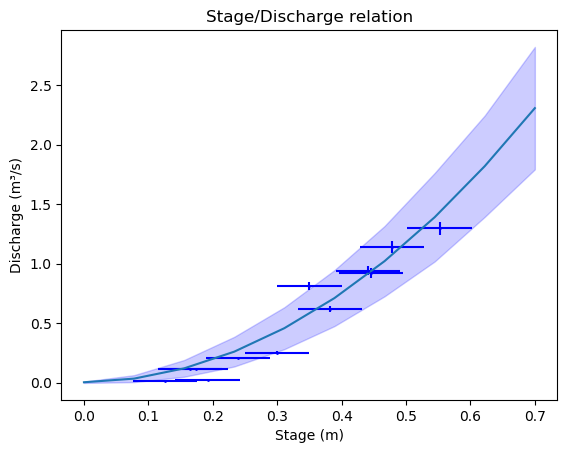

PyObject Text(0.5, 1, 'Stage/Discharge relation')

In [20]:
#Import from discharge_homogenization (i.e the corrected Qs3):
Qs3 = [0.016, 0.022, 0.115, 0.116, 0.206, 0.251, 0.809, 1.297, 1.138, 0.921, 0.94, 0.618]
stage3_select = [0.126, 0.192, 0.165, 0.174, 0.239, 0.3, 0.35, 0.552, 0.478, 0.446, 0.441, 0.382]
err_Qs3 = [0.001, 0.001, 0.005, 0.005, 0.009, 0.01, 0.034, 0.055, 0.049, 0.039, 0.04, 0.026];

#Plot relation with error
h = range(0,stop = 0.7, length = 10)
q = mean.(discharge.(h))
σs = std.(discharge.(h))

#let's plot the rating curve and std deviation associated

plot(h,q,label = "Least square fit with standard deviation")
fill_between(h, q .- σs, q .+ σs, alpha=0.2, color = "blue")
errorbar(stage3_select, Qs3, xerr = err_stage_hand, yerr = err_Qs3, color="blue", fmt="o", markersize = 1, label="Field Measurements")
xlabel("Stage (m)")
ylabel("Discharge (m³/s)")
title("Stage/Discharge relation")

#### Now let's implement these uncertaities in the discharge time series calculated from continuous stage time series `stage3` 

In [21]:
d, head = readdlm(path_products*"stage3_hour.csv" , ',', header=true);
stage3_hour = d[:,2];
t3_hour = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

qp3_mc = discharge.(stage3_hour)
qp3_hour_mean = mean.(qp3_mc)
σs_qp3 = std.(qp3_mc);

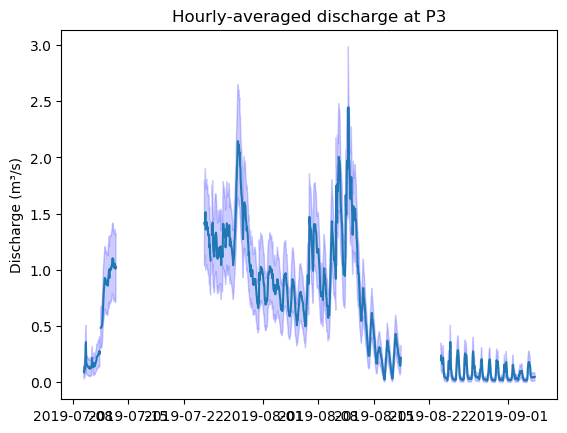

PyObject Text(0.5, 1, 'Hourly-averaged discharge at P3')

In [22]:
plot(t3_hour, qp3_hour_mean)
fill_between(t3_hour, qp3_hour_mean .- σs_qp3, qp3_hour_mean .+ σs_qp3, alpha=0.2, color = "blue")
ylabel("Discharge (m³/s)")
title("Hourly-averaged discharge at P3") 

# How to fill the datagap in `pq3` ?

## Reconstruct a continuous daily discharge time serie by using continous lake disharge time serie  $Q_{lake}$

**We make the hypothesis that the discharge from lake level measurements is equal to the discharge in canal (i.e. no leaks in other path duringthis time):**

In the following, $d$ means daily. Because we only have daily lake discharge

$ Qd_{canal} = Qd_{lake} - Qd_{in}$ 

This is motivated by the fact that both time series match very well during this time

In [23]:
d, head = readdlm(path_products*"discharge_lake_daily.csv" , ',', header=true);
qout_daily2 = d[:,2];
t = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

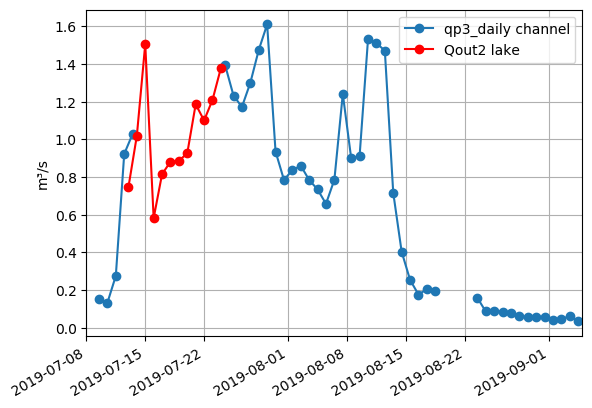

In [24]:
t_fill = collect(DateTime(2019,7,13):Day(1):(DateTime(2019,7,24)));
q_fill = qout_daily2[6:17]
pygui(false)
fig=figure()
plot(qp3_daily[1],qp3_daily[2],marker = "o",label="qp3_daily channel")
plot(t_fill,q_fill,marker = "o",label="Qout2 lake", color="red")


ylabel("m³/s")
xlim(DateTime(2019,7,8),DateTime(2019,9,5))
legend()
grid(true)
#axvline(x=DateTime(2019,7,10,12),linewidth=1,color="r")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right") 

## To fill data gap in channel discharge (`qp3_daily`) 

In [25]:
q_fill = qout_daily2[7:16]

ta = findfirst(x -> x == DateTime(2019,7,14,12), qp3_daily[1])
tb = findfirst(x -> x == DateTime(2019,7,23,12), qp3_daily[1])

qp3_full_daily = deepcopy(qp3_daily[2])
[qp3_full_daily[i] = q_fill for i = [ta:tb]];

# Plot continuous discharge time series in channel, hourly and daily

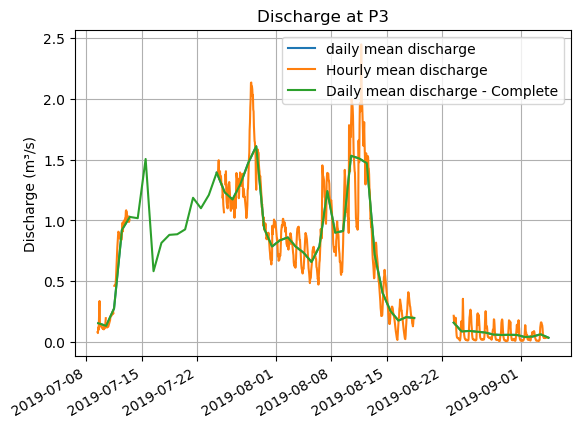

In [26]:
pygui(false)
fig=figure()
plot(qp3_daily[1],qp3_daily[2], label="daily mean discharge")
plot(qp3_hour[1],qp3_hour[2], label="Hourly mean discharge")
plot(qp3_daily[1], qp3_full_daily, label="Daily mean discharge - Complete")
title("Discharge at P3")
ylabel("Discharge (m³/s)")
legend()
grid(true)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right") 


# To store continuous discharge time series in CSV file

In [27]:

using DataFrames
using CSV

df=DataFrame(Date_Time = t3, Discharge = round.(qp3 , digits=3) );
CSV.write(path_products*"discharge_channel_corr_raw.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = qp3_daily[1], Discharge_daily = round.(qp3_daily[2], digits = 3));
CSV.write(path_products*"discharge_channel_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = qp3_daily[1], Discharge_daily = round.(qp3_full_daily, digits = 3));
CSV.write(path_products*"discharge_channel_full_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S")

df=DataFrame(Date_Time = qp3_hour[1], Discharge_hourly = round.(qp3_hour[2], digits = 3));
CSV.write(path_products*"discharge_channel_hourly.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

df=DataFrame(Date_Time = t3_hour, Discharge_hourly = round.(qp3_hour_mean, digits = 3), Standard_dev = round.(σs_qp3, digits = 3));
CSV.write(path_products*"discharge_channel_hourly_std_deviation.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");

# Reconstruct a complete daily water stage time serie (`stage3_full_daily`) @P3 from discharge/stage relation. 

Because of the datagap in pressure between 13th and 24th July we cannot have discharge in the channel using the stage/discharge relation. But daily discharge during the datagap was estimated above thanks to the [`Lake_data`](Lake_data.ipynb) (`qp3_full_daily`). So using the same relation **we can get daily water height from daily discharge**. 

**Paramters for stage/discharge relation:**

$ Q = a*h^b $ 

with  **a = 4.77±2.11**  and **b = 2.05±0.554**  



**Import $Q_{daily} $ `qp3_full_daily`**

In [28]:
#d, head = readdlm(path_products*"discharge_canal_full_daily.csv" , ',', header=true);
#qp3_full_daily is already created further up 

**Import water height at P3 `stage3_daily`**

In [29]:
d, head = readdlm(path_products*"stage3_daily.csv" , ',', header=true);
stage3_daily = d[:,2];
t3_daily = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]];

**Fill the gap in `stage3_daily` and create `stage3_full_daily`**

In [30]:
#from stage/discharge relationship above

a = round(fit.param[1],sigdigits=3) # 4.77 ;
b = round(fit.param[2],sigdigits=3) # 2.05 ; 

stage3_fill = (qp3_full_daily[6:15]./a).^(1/b)     #6-> 14th July ; 15 -> 23rd July

stage3_full_daily = stage3_daily

[stage3_full_daily[i] = stage3_fill for i = [6:15]];  #where daily value are missing

## To store `stage3_full_daily` in csv file 

In [31]:
df=DataFrame(Date_Time = t3_daily, Water_height = stage3_full_daily )
CSV.write(path_products*"stage3_full_daily.csv",df ; dateformat = "yyyy-mm-ddTH:M:S");